In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
sns.set_style('whitegrid')
%matplotlib inline

In [40]:
trainData= pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')
testData=pd.read_csv('./data/house-prices-advanced-regression-techniques/test.csv')

In [41]:
len(testData.columns),len(trainData.columns)

(80, 81)

In [42]:
def dropFloatCol(df):
    dropNumCol=[]
    for checkZeros in list(df.select_dtypes(exclude=['category', object]).columns)[:-1]:
        #convert nan to 0.0
        df[checkZeros].replace(np.nan,0.0, inplace=True)
        if len(df[checkZeros][df[checkZeros]==0.0])/len(df) >= .90:
            dropNumCol.append(checkZeros)
    if len(dropNumCol)>0:
        df.drop(dropNumCol, axis=1, inplace=True)
    return df,dropNumCol

In [43]:
trainData,dropNumColumns=dropFloatCol(trainData)

In [44]:
dropNumColumns

['LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [45]:
testData.drop(dropNumColumns, axis=1, inplace=True)

In [47]:
len(testData.columns),len(trainData.columns)

(74, 75)

In [48]:
for checkZerosTest in list(testData.select_dtypes(exclude=['category', object]).columns)[:-1]:
    testData[checkZerosTest].replace(np.nan,0.0, inplace=True)

In [49]:
def convertCatToNum(df):
    cat_map_dict={}
    for cat in list(df.select_dtypes(include=['category', object]).columns):
        #convert nan to None
        df[cat].replace(np.nan,'None', inplace=True)
        catUnq=list(map(str,list(df[cat].unique())))
        noneStatus=[l for l in catUnq if l.lower()=='none']
        addnone=1
        if len(noneStatus)>0:
            addnone=0
            for n in noneStatus:
                del catUnq[catUnq.index(n)]
            catUnq.insert(0,'None')
        cat_map_dict[cat]={d:i+addnone for i,d in enumerate(catUnq)}
    return cat_map_dict

In [50]:
def dropCatCol(df):
    mappedCatDic=convertCatToNum(df)
    dropCatCol=[]
    for catcount in mappedCatDic:
        df[catcount] = df[catcount].map(mappedCatDic[catcount])
        if (len(df[catcount][df[catcount]==0])/len(df)) >= .90:
            dropCatCol.append(catcount)
    
    if len(dropCatCol)>0:
        df.drop(dropCatCol, axis=1, inplace=True)
    return df,mappedCatDic,dropCatCol

In [51]:
trainData,catMapDic,dropCatColumns=dropCatCol(trainData)

In [52]:
len(testData.columns),len(trainData.columns)

(74, 72)

In [53]:
for testCatCol in catMapDic:
    try:
        testData[testCatCol].replace(np.nan,'None', inplace=True)
        testData[testCatCol] = testData[testCatCol].map(catMapDic[testCatCol])
    except KeyError:
        pass

In [54]:
trainData.drop(['Id'], axis=1, inplace=True)
testData.drop(['Id'], axis=1, inplace=True)

In [55]:
testData.drop(dropCatColumns, axis=1, inplace=True)

In [56]:
len(testData.columns),len(trainData.columns)

(70, 71)

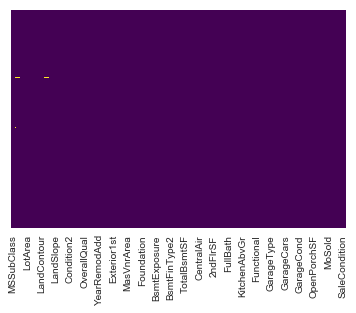

In [58]:
#cbar false means no color bar and yticklabels false means no y label and check null value in yellow if present
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
##replace Nan value to 0.0 in test Data
for testCol in testData.columns:
    testData[testCol].replace(np.nan,0.0, inplace=True)

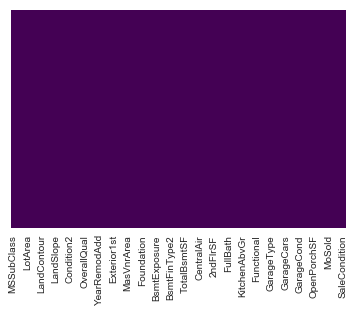

In [60]:
#cbar false means no color bar and yticklabels false means no y label and check null value in yellow if present
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
train_features=trainData[trainData.columns[:-1]]
test_features=testData
train_target=trainData[trainData.columns[-1]]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state=101)

In [64]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train,y_train)

/Users/pallab/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
feature_importances_train = pd.DataFrame(rf_train.feature_importances_,
                                        index = train_features.columns, 
                                        columns=['importance']).sort_values('importance',ascending=False)
feature_importances_train

,importance
OverallQual,0.569237
GrLivArea,0.081966
TotalBsmtSF,0.064099
GarageArea,0.040733
BsmtFinSF1,0.033733
2ndFlrSF,0.023205
1stFlrSF,0.021258
LotArea,0.016448
BsmtUnfSF,0.013102
OpenPorchSF,0.009246


In [66]:
predictions_train = rf_train.predict(X_test)

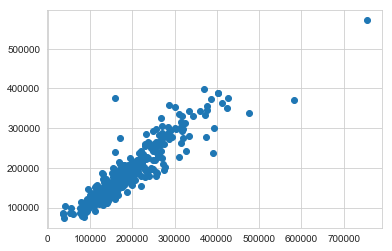

In [67]:
plt.scatter(y_test,predictions_train)

In [68]:
np.corrcoef(y_test,predictions_train)

array([[1.        , 0.92192184],
       [0.92192184, 1.        ]])

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_train))
print('MSE:', metrics.mean_squared_error(y_test, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_train)))
print('R-Squared',r2_score(y_test, predictions_train))

MAE: 18676.78789954338
MSE: 980485631.7389727
RMSE: 31312.7071927512
R-Squared 0.8441901007959861


In [70]:
rf = RandomForestRegressor()
rf.fit(train_features,train_target)

/Users/pallab/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                        index = train_features.columns, 
                                        columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
OverallQual,0.569058
GrLivArea,0.098315
TotalBsmtSF,0.049674
1stFlrSF,0.034971
BsmtFinSF1,0.029583
2ndFlrSF,0.025122
FullBath,0.020472
GarageCars,0.017296
LotArea,0.016856
MasVnrArea,0.010916


In [72]:
predictions = rf.predict(test_features)

In [73]:
predictionsDF=test_features
predictionsDF["Predicted Sales price"]=predictions

In [74]:
predictionsDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Predicted Sales price
0,20,5.0,80.0,11622,1,1,1,1.0,1,1,...,1,140,0,0,1,6,2010,1.0,1,128420.0
1,20,1.0,81.0,14267,1,2,1,1.0,3,1,...,1,393,36,0,0,6,2010,1.0,1,147200.0
2,60,1.0,74.0,13830,1,2,1,1.0,1,1,...,1,212,34,0,1,3,2010,1.0,1,177690.0
3,60,1.0,78.0,9978,1,2,1,1.0,1,1,...,1,360,36,0,0,6,2010,1.0,1,181650.0
4,120,1.0,43.0,5005,1,2,4,1.0,1,1,...,1,0,82,0,0,1,2010,1.0,1,189200.0
